🗺️ STEP 1: REGION OF INTEREST SELECTION
📍 Defining Dehradun Study Areas...
💾 Saving ROI files...
✅ ROI files saved:
   - data/roi/dehradun_urban.geojson
   - data/roi/dehradun_forest.geojson
   - data/roi/dehradun_urban.wkt
   - data/roi/dehradun_forest.wkt
🎨 Creating ROI visualization...


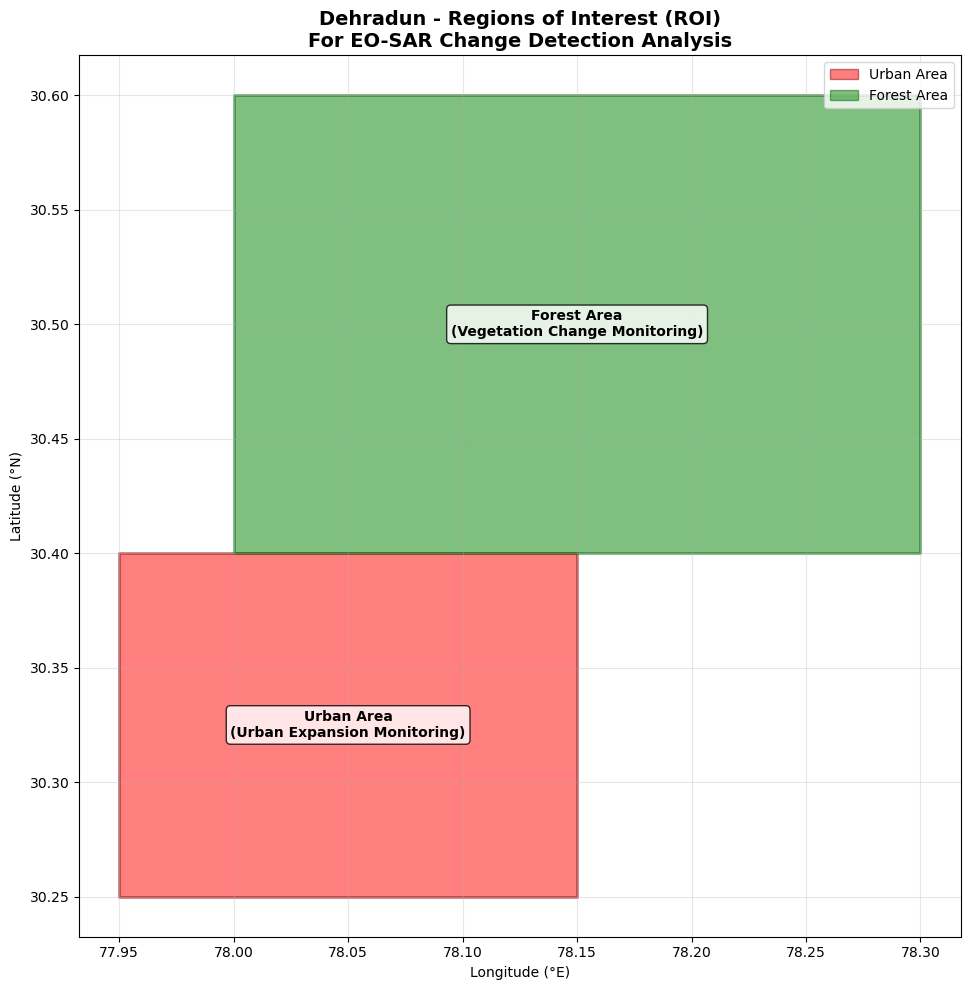


📋 ROI DETAILS:
📍 URBAN AREA:
   Purpose: Urban expansion monitoring 2019-2023
   Use Case: Urban Feature Change Monitoring
   Bounds: 77.95°E-78.15°E, 30.25°N-30.40°N
   Area: ~44.0 km²

📍 FOREST AREA:
   Purpose: Vegetation and land-cover change monitoring
   Use Case: Vegetation and Land-Cover Change
   Bounds: 78.00°E-78.30°E, 30.40°N-30.60°N
   Area: ~60.0 km²

🎉 STEP 1 COMPLETED: ROI selection and definition done!
➡️  Next: Data acquisition with automated download


In [6]:
# Cell 1: Import libraries and setup
import os
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

print("🗺️ STEP 1: REGION OF INTEREST SELECTION")
print("="*50)

# Create project structure
os.makedirs('data/roi', exist_ok=True)
os.makedirs('output/visualizations', exist_ok=True)

# Cell 2: Define Dehradun ROIs for Urban and Forest monitoring
print("📍 Defining Dehradun Study Areas...")

# ROI 1: Urban Area for Urban Expansion Monitoring
dehradun_urban = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "name": "Dehradun Urban Area",
                "location": "Dehradun, Uttarakhand",
                "purpose": "Urban expansion monitoring 2019-2023",
                "area_sqkm": 44.0,
                "use_case": "Urban Feature Change Monitoring"
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [77.95, 30.25],  # Bottom-left
                    [78.15, 30.25],  # Bottom-right
                    [78.15, 30.40],  # Top-right
                    [77.95, 30.40],  # Top-left
                    [77.95, 30.25]   # Close polygon
                ]]
            }
        }
    ]
}

# ROI 2: Forest Area for Vegetation Change Monitoring
dehradun_forest = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {
                "name": "Dehradun Forest Area", 
                "location": "Shivalik Hills, Dehradun",
                "purpose": "Vegetation and land-cover change monitoring",
                "area_sqkm": 60.0,
                "use_case": "Vegetation and Land-Cover Change"
            },
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [78.00, 30.40],  # Bottom-left
                    [78.30, 30.40],  # Bottom-right
                    [78.30, 30.60],  # Top-right
                    [78.00, 30.60],  # Top-left
                    [78.00, 30.40]   # Close polygon
                ]]
            }
        }
    ]
}

# Cell 3: Save ROI files
print("💾 Saving ROI files...")

# Save as GeoJSON
with open('data/roi/dehradun_urban.geojson', 'w') as f:
    json.dump(dehradun_urban, f, indent=2)

with open('data/roi/dehradun_forest.geojson', 'w') as f:
    json.dump(dehradun_forest, f, indent=2)

# Save as WKT (for APIs)
urban_polygon = "POLYGON ((77.95 30.25, 78.15 30.25, 78.15 30.40, 77.95 30.40, 77.95 30.25))"
forest_polygon = "POLYGON ((78.00 30.40, 78.30 30.40, 78.30 30.60, 78.00 30.60, 78.00 30.40))"

with open('data/roi/dehradun_urban.wkt', 'w') as f:
    f.write(urban_polygon)

with open('data/roi/dehradun_forest.wkt', 'w') as f:
    f.write(forest_polygon)

print("✅ ROI files saved:")
print("   - data/roi/dehradun_urban.geojson")
print("   - data/roi/dehradun_forest.geojson") 
print("   - data/roi/dehradun_urban.wkt")
print("   - data/roi/dehradun_forest.wkt")

# Cell 4: Visualize ROIs (FIXED VERSION - no warnings)
print("🎨 Creating ROI visualization...")

# Create GeoDataFrames
urban_gdf = gpd.GeoDataFrame.from_features(dehradun_urban['features'])
forest_gdf = gpd.GeoDataFrame.from_features(dehradun_forest['features'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot urban area with explicit label
urban_patch = urban_gdf.plot(ax=ax, color='red', alpha=0.5, edgecolor='darkred', linewidth=2)
# Plot forest area with explicit label  
forest_patch = forest_gdf.plot(ax=ax, color='green', alpha=0.5, edgecolor='darkgreen', linewidth=2)

# Add labels
urban_centroid = urban_gdf.geometry.centroid.iloc[0]
forest_centroid = forest_gdf.geometry.centroid.iloc[0]

ax.text(urban_centroid.x, urban_centroid.y, 'Urban Area\n(Urban Expansion Monitoring)', 
        ha='center', va='center', fontweight='bold', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax.text(forest_centroid.x, forest_centroid.y, 'Forest Area\n(Vegetation Change Monitoring)', 
        ha='center', va='center', fontweight='bold', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Map settings
ax.set_title('Dehradun - Regions of Interest (ROI)\nFor EO-SAR Change Detection Analysis', fontsize=14, fontweight='bold')
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
ax.grid(True, alpha=0.3)

# Create custom legend (FIXED - no warnings)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.5, edgecolor='darkred', label='Urban Area'),
    Patch(facecolor='green', alpha=0.5, edgecolor='darkgreen', label='Forest Area')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('output/visualizations/roi_map.png', dpi=300, bbox_inches='tight')
plt.show()
# Cell 5: Print ROI details
print("\n📋 ROI DETAILS:")
print("="*40)
print("📍 URBAN AREA:")
print(f"   Purpose: {dehradun_urban['features'][0]['properties']['purpose']}")
print(f"   Use Case: {dehradun_urban['features'][0]['properties']['use_case']}")
print(f"   Bounds: 77.95°E-78.15°E, 30.25°N-30.40°N")
print(f"   Area: ~{dehradun_urban['features'][0]['properties']['area_sqkm']} km²")

print("\n📍 FOREST AREA:")
print(f"   Purpose: {dehradun_forest['features'][0]['properties']['purpose']}")
print(f"   Use Case: {dehradun_forest['features'][0]['properties']['use_case']}")
print(f"   Bounds: 78.00°E-78.30°E, 30.40°N-30.60°N") 
print(f"   Area: ~{dehradun_forest['features'][0]['properties']['area_sqkm']} km²")

print("\n🎉 STEP 1 COMPLETED: ROI selection and definition done!")
print("➡️  Next: Data acquisition with automated download")